# 1. Linear Regression

### 공부 시간에 따른 시험 점수

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [3]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [4]:
X = dataset.iloc[:, :-1].values # iloc[row, col]; e.g. [:, :-1] means all rows, all columns except last -> independent variables
y = dataset.iloc[:, -1].values # dependent variable (only the last column)

In [5]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # create an object
reg.fit(X, y) # 학습 (모델 생성)

LinearRegression()

In [7]:
y_pred = reg.predict(X) # X에 대한 예측 값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

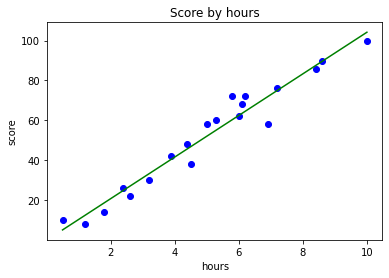

In [8]:
plt.scatter(X, y, color='blue') # scatter plot
plt.plot(X, y_pred, color='green') # line graph (line of best fit)
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [9]:
print('9시간 공부했을 때 예상 점수: ', reg.predict([[9]]))

9시간 공부했을 때 예상 점수:  [93.77478776]


In [10]:
reg.coef_ # slope (m)

array([10.44369694])

In [11]:
reg.intercept_ # y interception (b)

-0.21848470286721522

Therefore the line equation would be:    
> y = mx + b -> y = 10.4437x - 0.2185

***
### 데이터 세트 분리

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [14]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [15]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [16]:
from sklearn.model_selection import train_test_split

# we only set random_state to 0 here because we want to get same results as the video
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # test_size must be between (0, 1)

In [17]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [18]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [19]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [20]:
y, len(y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]),
 20)

In [21]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

In [22]:
y_test, len(y_test)

(array([ 90,   8, 100,  38]), 4)

***
### 분리된 데이터를 통한 모델링

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [24]:
reg.fit(X_train, y_train)

LinearRegression()

### 데이터 시각화 (훈련 세트)

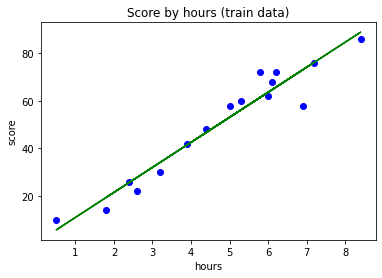

In [25]:
plt.scatter(X_train, y_train, color='blue') # scatter plot
plt.plot(X_train, reg.predict(X_train), color='green') # line graph (line of best fit)
plt.title('Score by hours (train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (테스트 세트)

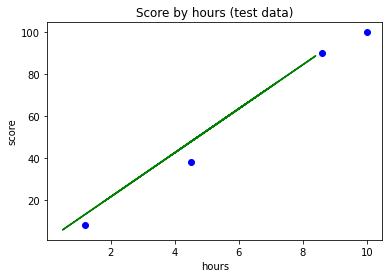

In [26]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green') # we leave this part the same since we want the line from train set
plt.title('Score by hours (test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [27]:
reg.coef_

array([10.49161294])

In [28]:
reg.intercept_

0.6115562905169796

y = mx + b -> y = 10.4916x + 0.6116

### 모델 평가

In [29]:
reg.score(X_test, y_test) # 테스트 세트를 통한 모델 평가

0.9727616474310156

In [30]:
reg.score(X_train, y_train) # 훈련 세트를 통한 모델 평가

0.9356663661221668

***
## 경사 하강법 (Gradient Descent)

max_iter: 훈련 세트 반복 횟수 (Epoch 횟수)   
eta0: 학습률 (learning rate)   
verbose: shows the iterations 

In [46]:
from sklearn.linear_model import SGDRegressor # SGD: Stopchastic Gradient Descent 확률적 경사 하강법
# sr = SGDRegressor(max_iter=1000, eta0=0.0001, random_state=0, verbose=1)
sr = SGDRegressor()
sr.fit(X_train, y_train)

SGDRegressor()

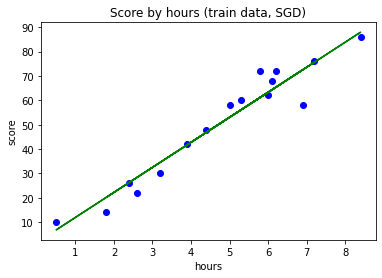

In [47]:
plt.scatter(X_train, y_train, color='blue') # scatter plot
plt.plot(X_train, sr.predict(X_train), color='green') # line graph (line of best fit)
plt.title('Score by hours (train data, SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [48]:
sr.coef_, sr.intercept_

(array([10.27360046]), array([1.66432074]))

In [49]:
sr.score(X_test, y_test)

0.9730478037804382

In [50]:
sr.score(X_train, y_train)

0.9352614817034639